## 2.1 ODE Model of Information Diffusion

The previously implemented SIR-CA model considers a static network structure where the number of nodes and their relationship remain constant over time. However, as we very well know, such is not the case in the real world. Online social networks are constantly changing over time as new users sign-up and old, disgruntled users decide to abandon the platform. Hence, the structure of the network is constantly evolving and this in turn effects the manner in which information diffuses in the network.Therefore, this section accounts for changes in population dynamics in online social networks with the help of a continuous time model.

**Exercise 5**: (15 points) Design and implement a  continous time model system for information diffusion given that the population of the network is subject to change. Take into account the definition of N as the number of nodes (people) in the network and its variation over time is defined as 
$$ N(t) = S (t) + I (t) + R (t)$$

where,

$S$ = Healthy node (Has not received the information)

$I$ = Users who have received the information and transfer it to others. The transmission probability is $p_1$. If a transmission node has already spread the information, then it would become an immune node which means the probability of this node changing to an immune node is 1.

$R$ = Users who will not spread information to others, but may become a transmission node if it is repeatedly contacted by other transmission nodes. The probability $p_2$ that the immune node becomes a transmission node depends on its neighbors ($p_2$= the total number of transmission neighbor nodes/ the total number of neighbors).

The increase in $N(t)$ satisfies the population dynamics of a logistic equation:
$$\frac{dN}{dt}= rN(1 − N/K)$$

**Exercise 5.1** Write an ordinary differential equation to model the system:

$$\begin{cases}dS/dt=(a-b)S -\gamma SN-p_1SI\\
dI/dt=p_2(N-S-I)-(b+\gamma N)I\\
dN/dt=aS-(b+\gamma N)N\end{cases}$$
transfer it to algorithm:
$$nextS=S+((a-b)*S-r*S*N-p1*S*I)*Dt$$
  $$ nextI=I+(p2*(N-S-I)-(b+r*N)*I)*Dt$$
   $$nextN=N+(a*S-(b+r*N)*N)*Dt$$
   $$nextt=t+Dt$$
   
**Exercise 5.2** Find fixed points of the system

$$(a-b)S-\gamma SN-p_1SI=0$$
$$p_2(N-S-I)-(b+\gamma N)I=0$$
$$aS-(b+\gamma N)N=0$$

Solving the equation set, we obtain the following:
$$ N_1=\frac{(a-b)}{\gamma}, N_0=\frac{p_2a+ab}{p_2p_1-a\gamma}$$
which means there are 2 equilibrium point.

If $$p_2p_1-a\gamma<0$$ $$K<=a(a-b)/p_2p_1=1.53$$
$N_0$ is unstable, and  $N_1$  is a stable and positive point which corresonding to the simulated result for $$N(t\to \infty)=(a-b)/\gamma$$
Otherwise if $p_2p_1-a\gamma>0$ and $N_1>N_0$,
$N_0$ is a stable point and vice versa.



**Exercise 5.3** Taking the following parameter definition, write the necessary functions to simulate a continuous time model for information diffusion 

$a=0.45 $ (New registered users growh rate  per month)

$b=0.3$ (Inactive users rate per month)

$k$ (Environmental intake capacity of online social networks)

$r=(a-b)/k$

$Dt=0.01 $

$p_1$  (The contact rate between the healthy node and transmission node)

$p_2=0.55 $ (Probability that each immune node will become a transmission node)


In [1]:
import pylab 
import numpy 
import pandas as pd 
import matplotlib.pyplot as plt
def continuous_simulation(k, p1, running_time = 350.):
    a=0.45
    b=0.3
    Dt=0.01
    p2=0.55
    r=(a-b)/k

    def initialize():
        global S, I, N, Sresult, Iresult, Nresult, t, timesteps
        S=2400/10000
        Sresult=[S]
        I=400/10000
        Iresult=[I]
        N=4039/10000
        Nresult=[N]
        t=0.
        timesteps=[t]

    def observe():
        global S, I, N, Sresult, Iresult, Nresult, t, timesteps
        Sresult.append(S)
        Iresult.append(I)
        Nresult.append(N)
        timesteps.append(t)

    def update():
        global S, I, N, Sresult, Iresult, Nresult, t, timesteps
        nextS=S+((a-b)*S-r*S*N-p1*S*I)*Dt
        nextI=I+(p2*(N-S-I)-(b+r*N)*I)*Dt
        nextN=N+(a*S-(b+r*N)*N)*Dt
        nextt=t+Dt
        S, I, N, t=nextS, nextI, nextN, nextt

    initialize()
    while t<running_time:
        update()
        observe()
    return (timesteps,Sresult,Iresult,Nresult)


In [2]:
def one_step_plot(timesteps,Sresult,Iresult,Nresult, plot_title):
    plt.plot(timesteps, Sresult, 'b--', label="Healthy nodes") 
    plt.plot(timesteps, Iresult, 'g--', label="Transmission nodes") 
    plt.plot(timesteps, Nresult, 'r-', label="Total nodes") 
    plt.title(plot_title)
    plt.xlabel ('time')
    plt.ylabel ('node density')
    plt.legend()

**Exercise 6.1** (2 points) Simulate the results of the continuous time model with $k=5$

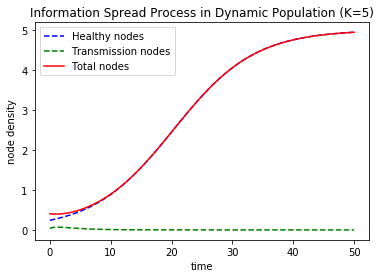

In [3]:
timesteps, Sresult, Iresult, Nresult = continuous_simulation(k=5, 
                                                             p1=0.08,running_time =50)
one_step_plot(timesteps,Sresult,Iresult, 
              Nresult, plot_title = "Information Spread Process in Dynamic Population (K=5)")

**Exercise 6.2** (2 points) Simulate the results of the continuous time model with $k=25$

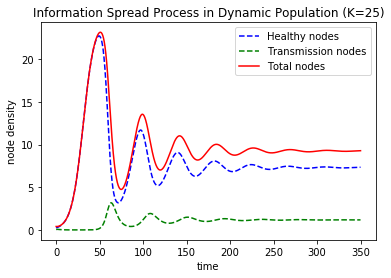

In [4]:
timesteps,Sresult,Iresult,Nresult = continuous_simulation(k=25, p1=0.08, running_time = 350)
one_step_plot(timesteps, Sresult, Iresult, Nresult, 
              plot_title = "Information Spread Process in Dynamic Population (K=25)")

## 2.2 Model simulation

From one-step simulation,  when k is small, the information will not spread through the network successfuly since the infected nodes will recover to immune node or just the pouplation may tend to zero. With increasing k value,  at the begining, information is unconfirmed; thus, a piece of information spreads rapidly in a short period through friendly relationships between people in social networks. In such a case, healthy and transmission nodes density will oscillate to a stable point which we discussed before.

**Exercise 7** (5 points): Simulate the influence of $p_1$ on the system with different values of $p_1$ and comment on the observed results

In [5]:
def simulation(p1_list, k_test):
    iteration_result=dict()
    
    for p1_test in p1_list:
        res = continuous_simulation(k_test, p1_test)
        test = res[0]
        timesteps = res[1]
        iteration_result.update({p1_test:test})
    return (iteration_result,timesteps)

Text(0.5, 1.0, 'p1 Influence on Health Node')

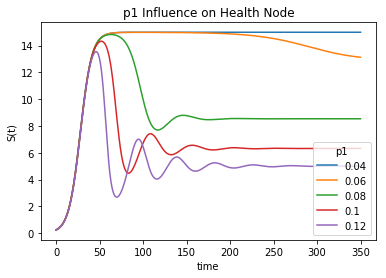

In [6]:
p1_list = [i*0.02 for i in range(2,7)] 
for p1_test in p1_list:
    res = continuous_simulation(15,p1_test)
    test = res[1]
    timesteps = res[0]
    plt.plot(timesteps, test,label=p1_test)
plt.legend(title='p1',loc = 4)
plt.xlabel ('time')
plt.ylabel ('S(t)')
plt.title("p1 Influence on Health Node")

Text(0.5, 1.0, 'p1 Influence on Transmission Node')

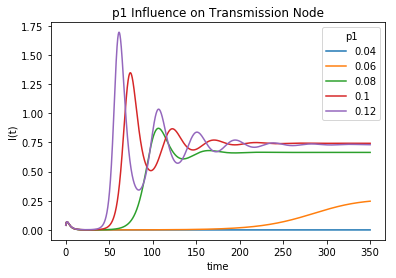

In [7]:
for p1_test in p1_list:
    res = continuous_simulation(15,p1_test)
    test = res[2]
    timesteps = res[0]
    plt.plot(timesteps, test,label=p1_test)
plt.legend(title='p1',loc = 'best')
plt.xlabel ('time')
plt.ylabel ('I(t)')
plt.title("p1 Influence on Transmission Node")

In this project, we are more interested in oscillation trend when the parameter k of environment capacity is larger. So we consider the different $p_1$ values for fixed k value of 15 to simulate different results of information spread trend. As shown in the above graghs,  when $p_1$ is small, the healthy and infected nodes will increase to a stable point without oscillation. However with the increasing values of $p_1$, the information will spread to other users in the network more rapidly, and they need more time to reach a stable status. This means that the information will effect other users for a longer time with a higher transfer probability of each time step. 



**Exercise 8** (5 points) Study the influence of $k$ on the system 


Text(0.5, 1.0, 'K Influence on Health Node')

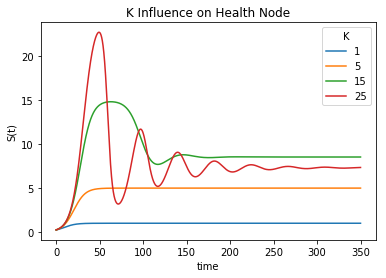

In [8]:
k_list = [1,5,15,25]
for k_test in k_list:
    res = continuous_simulation(k_test,0.08)
    test = res[1]
    timesteps = res[0]
    plt.plot(timesteps, test, label = k_test)
plt.legend(title='K',loc = "best")
plt.xlabel ('time')
plt.ylabel ('S(t)')
plt.title("K Influence on Health Node")

Text(0.5, 1.0, 'K Influence on Transmission Node')

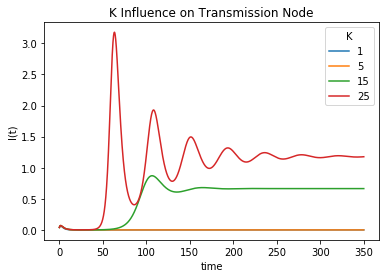

In [9]:
for k_test in k_list:
    res = continuous_simulation(k_test,0.08)
    test = res[2]
    timesteps = res[0]
    plt.plot(timesteps, test, label = k_test)
plt.legend(title='K',loc = "best")
plt.xlabel ('time')
plt.ylabel ('I(t)')
plt.title("K Influence on Transmission Node")

The above figures shows variation in S and I  (healthy and transmission nodes, respectively) with changing $k$ values at fixed $p_1=0.08$. It is obvious that with the increasing  environmental capacity $k$, the total number of healthy and infected nodes will oscillate more dramatically and also need more time to reach a stable point since more number of active users are able to join to the network.